<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# BayesianRidgeRegression with Scale & Power Transformer

This Code template is for the regression analysis using a BayesianRidge Regressor and the feature rescaling technique Scale & feature transform Power Transformer in a pipeline.

### Required Packages

In [54]:
import warnings as wr
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer,scale
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
wr.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [75]:
#filepath
file_path=''

List of features which are  required for model training .

In [56]:
#x_values
features=[]

Target feature for prediction.

In [57]:
#y_value
target='Chance'

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [58]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,Unnamed: 0,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,Chance
0,0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 500 ,and number of columns are : 10


In [60]:
df.columns.tolist()

['Unnamed: 0',
 'Serial No.',
 'GREScore',
 'TOEFLScore',
 'UniversityRating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'Chance']

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [61]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

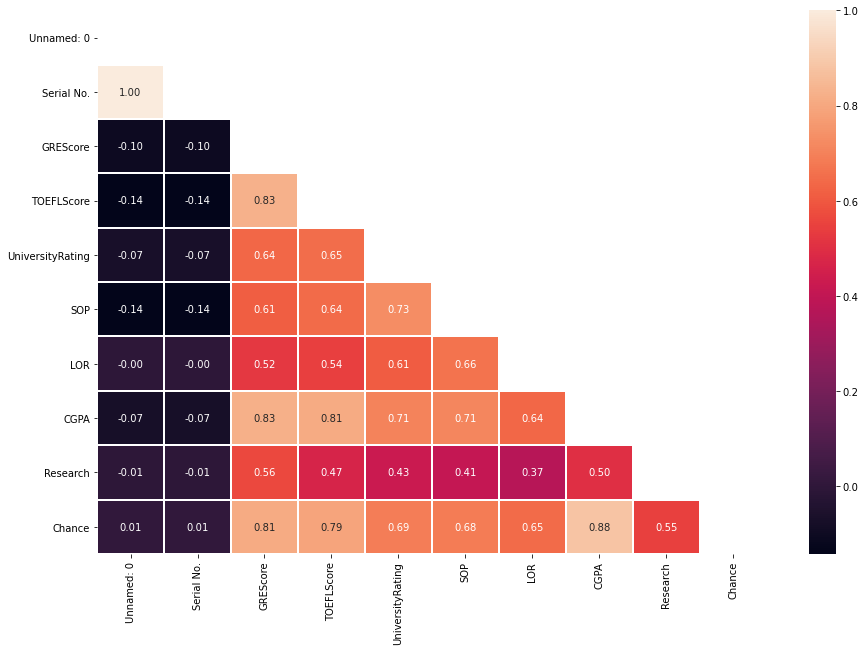

In [62]:
plt.figure(figsize = (15, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f")
plt.show()

In [63]:
correlation = df[df.columns[1:]].corr()[target][:]
correlation

Serial No.          0.008505
GREScore            0.810351
TOEFLScore          0.792228
UniversityRating    0.690132
SOP                 0.684137
LOR                 0.645365
CGPA                0.882413
Research            0.545871
Chance              1.000000
Name: Chance, dtype: float64

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [64]:
#spliting data into X(features) and Y(target)

X=df[features]
Y=df[target]  

Calling preprocessing functions on the feature and target set.

In [65]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=NullClearner(Y)
X.head()

,Serial No.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0


### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [66]:
#we can choose randomstate and test_size as over requerment
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) #performing datasplitting

### Data Scaling
**scale**

* Standardize a dataset along any axis.
* Center to the mean and component wise scale to unit variance.

In [67]:
#scaling traing and testing set
X_train=scale(X_train)
X_test=scale(X_test)

### Feature Transformation
#### Power Transformer :

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.
Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html) for the parameters
## Model

#### Bayesian Regression
Bayesian Regression can be very useful when we have insufficient data in the dataset or the data is poorly distributed. The output of a Bayesian Regression model is obtained from a probability distribution, as compared to regular regression techniques where the output is just obtained from a single value of each attribute. Bayesian regression techniques can be used to include regularization parameters in the estimation procedure: the regularization parameter is not set in a hard sense but tuned to the data at hand.

If there is a large amount of data available for our dataset, the Bayesian approach is not good for such cases.

**Model Tuning Parameters :**

* **alpha_1 :** shape parameter for the Gamma distribution prior over the alpha parameter.

* **alpha_2 :** inverse scale parameter (rate parameter) for the Gamma distribution prior over the alpha parameter.

* **lambda_1 :** shape parameter for the Gamma distribution prior over the lambda parameter.

* **lambda_2 :** inverse scale parameter (rate parameter) for the Gamma distribution prior over the lambda parameter.

In [68]:
#training the BayesianRidge
Input=[("Feature Transformation",PowerTransformer()),("model",BayesianRidge())]
model = Pipeline(Input)
model.fit(X_train,y_train)

Pipeline(steps=[('Feature Transformation', PowerTransformer()),
                ('model', BayesianRidge())])

#### Model Accuracy
score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [69]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 82.17 %



In [70]:
#prediction on testing set
prediction=model.predict(X_test)

### Model evolution


**r2_score:** The r2_score function computes the percentage variablility explained by our model, either the fraction or the count of correct predictions.

**MAE:** The mean abosolute error function calculates the amount of total error(absolute average distance between the real data and the predicted data) by our model.

**MSE:** The mean squared error function squares the error(penalizes the model for large errors) by our model.

In [71]:
print('Mean Absolute Error:', mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, prediction)))

Mean Absolute Error: 0.04285872689760979
Mean Squared Error: 0.003443054108535776
Root Mean Squared Error: 0.05867754347734554


In [72]:
print("R-squared score : ",r2_score(y_test,prediction))

R-squared score :  0.8217050329586362


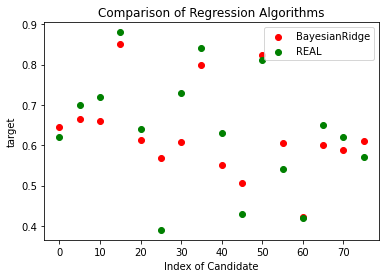

In [73]:
#ploting actual and predicted
red = plt.scatter(np.arange(0,80,5),prediction[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "green")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("target")
plt.legend((red,green),('BayesianRidge', 'REAL'))
plt.show()


### Prediction Plot
First, we make use of a plot to plot the actual observations, with x_train on the x-axis and y_train on the y-axis. For the regression line, we will use x_train on the x-axis and then the predictions of the x_train observations on the y-axis.

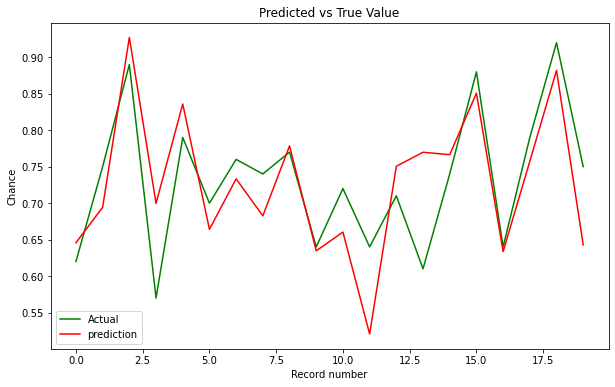

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(20),y_test[0:20], color = "green")
plt.plot(range(20),model.predict(X_test[0:20]), color = "red")
plt.legend(["Actual","prediction"]) 
plt.title("Predicted vs True Value")
plt.xlabel("Record number")
plt.ylabel(target)
plt.show()

#### Creator:  Akshar Nerkar , Github: [Profile](https://github.com/Akshar777)